# Dataset

link dataset:

[pelanggan_supermarket.csv](https://drive.google.com/uc?export=download&id=1jaxCbZ4fcCneeVCEN-yuxWE0RyX25tbQ)



---



---



---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('pelanggan_supermarket.csv')
df

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0




---



---



---



# 1. Statistika Deskriptif

Melakukan eksplorasi data dengan menggunakan statistika deskriptif. Menggunakan pandas untuk mendapatkan summary statistics, dan analisa hasil yang ditampilkan.

In [3]:
#code here
df.describe()

,ID_pelanggan,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
count,250.000000,245.000000,250.000000,246.000000
mean,125.500000,38.730612,64.736000,50.325203
std,72.312977,14.328726,25.112324,28.668121
min,1.000000,18.000000,15.000000,3.000000
25%,63.250000,29.000000,47.000000,26.250000
50%,125.500000,36.000000,70.000000,50.000000
75%,187.750000,48.000000,78.750000,74.750000
max,250.000000,120.000000,137.000000,150.000000


**Expected output**

![](https://drive.google.com/uc?id=1-5_d0Ey1lWMXj0d8ABimuPqqTz-h-8mx)

Finding: karakteristik pelanggan supermarket adalah rata-rata umur sekitar 38 tahun dengan rentang 18-120 tahun. Rata-rata pendapatan pelanggan sekitar Rp 64,7 juta per tahun. 



---



---



---



#2. Handling missing value

Jika dilihat dari summary statistik terlihat dataset memiliki nilai missing. Untuk itu perlu menghitung jumlah missing value menggunakan methode .isnull(). 

Mengisi nilai nan dengan nilai sebelumnya di row tersebut. Menggunakan method .fillna() dengan argument method bernilai 'ffill', referensi: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [4]:
#code here
df.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          5
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          4
dtype: int64

In [5]:
df_fill = df.fillna(method="ffill")
df_fill

,ID_pelanggan,Jenis Kelamin,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,1,Laki-laki,19.0,15,39.0
1,2,Laki-laki,21.0,15,81.0
2,3,Perempuan,20.0,16,6.0
3,4,Perempuan,23.0,16,77.0
4,5,Perempuan,31.0,17,40.0
...,...,...,...,...,...
245,246,Laki-laki,59.0,93,14.0
246,247,Laki-laki,35.0,93,90.0
247,248,Perempuan,37.0,97,32.0
248,249,Perempuan,32.0,97,86.0


In [6]:
df_fill.isnull().sum()

ID_pelanggan                  0
Jenis Kelamin                 0
Umur                          0
Pendapatan pertahun (juta)    0
Skor Belanja (1-100)          0
dtype: int64



---



---



---



#3. Handling outlier

1. Apakah data set memiliki nilai pencilan untuk setiap kolom? periksalah dengan melakukan visualisasi menggunakan boxplot.
2. Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)
3. simpan data hasil handling outlier ke dalam variabel df2
4. Teknik ini akan menghasilkan nilai missing pada nilai outlier yang telah dihapus, maka hapuslah data missing tersebut dengan menggunakan method .dropna()

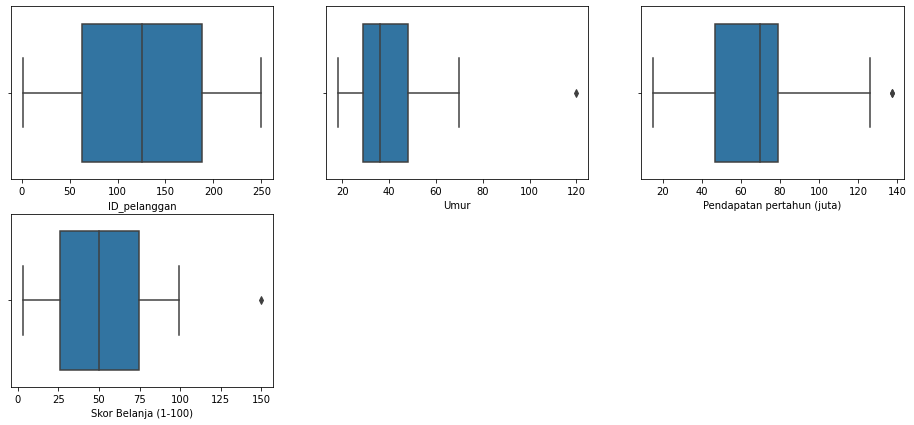

In [7]:
#  Categorical Data
sup_cat = df_fill[['ID_pelanggan', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']]

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,7))

for i in sup_cat:
    plt.subplot(a, b, c)
    sns.boxplot(df[i])
    c = c + 1

plt.show()

In [7]:
# Handling outlier tersebut dengan menggunakan teknik trimming / removing outliers (menggunakan teknik IQR)

def finding_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[(df<(Q1-(1.5*IQR))) | (df>(Q3+(1.5*IQR)))]
  return df_final

print(finding_outlier(df['Umur']))
print(finding_outlier(df['Pendapatan pertahun (juta)']))
print(finding_outlier(df['Skor Belanja (1-100)']))

249    120.0
Name: Umur, dtype: float64
198    137
199    137
Name: Pendapatan pertahun (juta), dtype: int64
16    150.0
Name: Skor Belanja (1-100), dtype: float64


In [8]:
def remove_outlier(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR  = Q3-Q1
  df_final = df[~(df>(Q1-(1.5*IQR))) | (df<(Q3+(1.5*IQR)))]
  return df_final

df2 = remove_outlier(df[['Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']])

df2.dropna(axis=0, inplace=True)
df2

,Umur,Pendapatan pertahun (juta),Skor Belanja (1-100)
0,19.0,15.0,39.0
1,21.0,15.0,81.0
2,20.0,16.0,6.0
3,23.0,16.0,77.0
4,31.0,17.0,40.0
...,...,...,...
244,27.0,88.0,69.0
245,59.0,93.0,14.0
246,35.0,93.0,90.0
247,37.0,97.0,32.0


**Expected output**

Melihat adanya pencilan menggunakan Boxplot

![](https://drive.google.com/uc?id=1ettD4G8xBMCYcMUVt88kn5k_yCufgdyf)



---



---



---



#4. statistika Inferential



*   Kita akan melakukan hipotesis terhadap 100 sample pengunjung Supermarket. Hipotesis awal adalah rata2 usia pengunjung supermarket di atas 35 tahun. Ujilah hipotesis tersebut dengan menggunakan teknik klasik (z-testing) dan probabilitas p-value)!
*   Gunakan variabel dataframe hasil handling missing value dan outlier di no soal sebelumnya
*   Untuk mempermudah perhitungan, ubahlah tipe data kolom Umur menjadi int dengan menggunakan methode .astype() , referensi https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html





In [10]:
df_100 = df2.sample(100,  random_state=1)
df_100['Umur'] = df_100['Umur'].astype(int)

In [11]:
#code here for z-test
#one tailed test
#null hypothesis: rata-rata usia pengunjung supermarket = 35 tahun (mean 'Umur' = 35)
#alt. hypothesis: rata-rata usia pengunjung supermarket > 35 tahun (mean 'Umur' > 35)

ztable = 1.645
zscore = ( df_100['Umur'].mean() - 35 ) / (df_100['Umur'].std()/100**(0.5))

if zscore<ztable:
    print("rata-rata usia pengunjung supermarket = 35 tahun")
else:
    print("rata-rata usia pengunjung supermarket > 35 tahun")

rata-rata usia pengunjung supermarket > 35 tahun


In [12]:
#code here for p-value
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df_100['Umur'], value=35)
print(pval)
if pval>0.05:
    print("rata-rata usia pengunjung supermarket = 35 tahun")
else:
    print("rata-rata usia pengunjung supermarket > 35 tahun")

0.012867672183696988
rata-rata usia pengunjung supermarket > 35 tahun


Finding: Berdasarkan uji hipotesis baik itu dengan uji z ataupun p-value menunjukkan jika rata-rata pengunjung berusia lebih dari 35 tahun.



---



---



---



## Soal 5. EDA

Melakukan eksplorasi data analisis. Menggunakan visualisasi distplot untuk melihat sebaran data dan histogram pada setiap kolom dataset awal sebelum dilakukan handling missing value maupun outlier

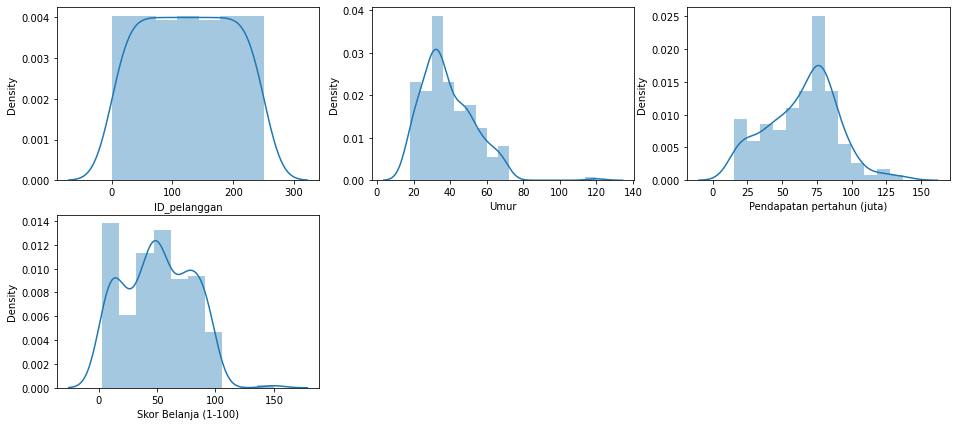

In [15]:
sup_cat = df[['ID_pelanggan', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']]

#  Categorical Data
a = 2  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,7))

for i in sup_cat:
    plt.subplot(a, b, c)
    sns.distplot(df[i])
    c = c + 1

plt.show()

Finding: Melihat sebaran umur pelanggan umumnya pelanggan terbanyak berusia sekitar 25-40 tahun. Sementara dilihat dari tingkat pendapatan per tahun, banyak pelanggan yang memiliki pendapatan di kisaran 75-80 juta per tahun. Skor belanja pelanggan paling banyak ada di kisaran 50.

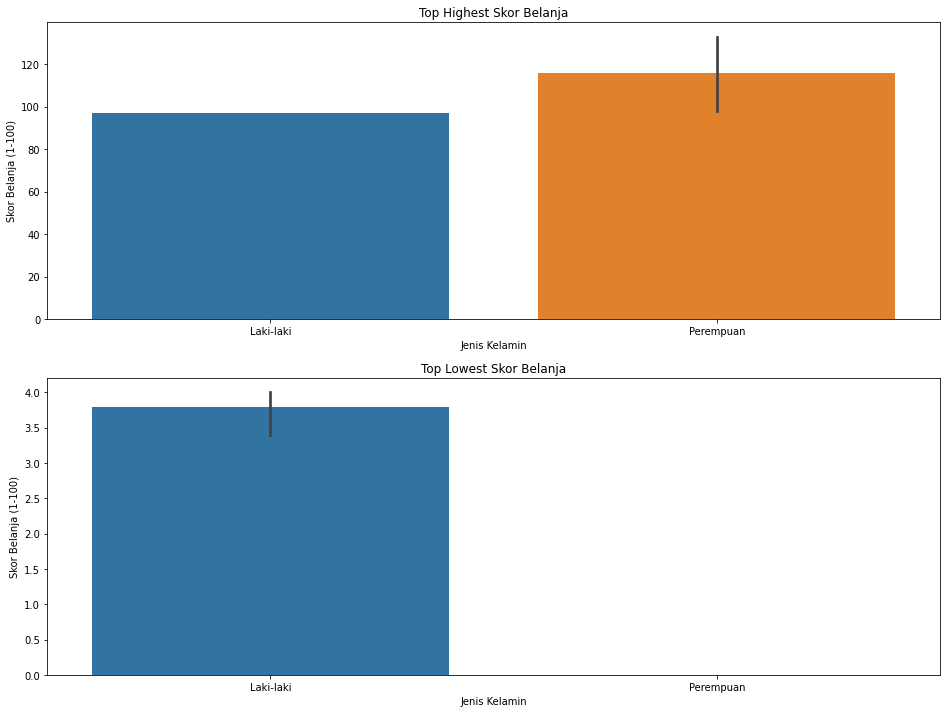

In [28]:
#code here for bivariate
fig = plt.figure(figsize=(16,12))

plt.subplot(2, 1, 1)
plt.title('Top Highest Skor Belanja')
sns.barplot(data=df, x = df['Jenis Kelamin'], y = df['Skor Belanja (1-100)'].nlargest(5))

plt.subplot(2, 1, 2)
plt.title('Top Lowest Skor Belanja')
sns.barplot(data=df, x = df['Jenis Kelamin'], y = df['Skor Belanja (1-100)'].nsmallest(5))
plt.show()

Finding: Di tingkat highest skor belanja, kelompok perempuan berbelanja lebih banyak, sementara di tingkat lowest skor belanja, kelompok perempuan tidak masuk sama sekali. Hal ini menunjukkan jika kelompok perempuan lebih cenderung untuk berbelanja lebih banyak ketimbang kelompok laki-laki.

<AxesSubplot:>

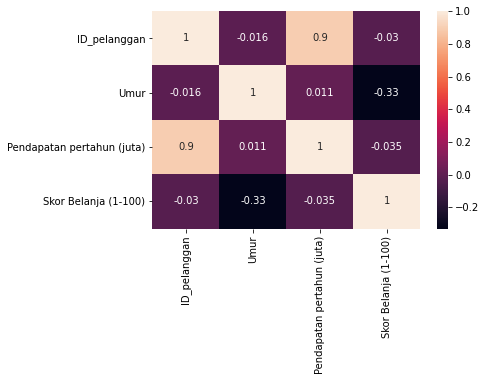

In [23]:
#code here for multivariate

f = df[['ID_pelanggan', 'Umur', 'Pendapatan pertahun (juta)', 'Skor Belanja (1-100)']].corr()
sns.heatmap(f, annot=True)


Finding: Terlihat korelasi atau hubungan yang cukup tinggi antara umur dengan skor belanja. Hubungan bersifat negatif, di mana semakin tinggi umur, semakin rendah skor belanja.

**Expected output**

Univariate plot

![](https://drive.google.com/uc?id=12BSOah7WFzuOEJsKfsaNDw799zzqbDIs)

Bivariate plot

![](https://drive.google.com/uc?id=1JI_NM4Nr-ZN1aszv0m-iL46Qm0xNLFw3)

Multivariate plot

![](https://drive.google.com/uc?id=1TTXm3BjoqqwSGMGE1en9ZIJT53Wm5SFf)



---

---



---





#6. Data scaling
Melakukan scaling data dengan menggunakan standarisasi untuk kolom Umur dan skor belanja saja tetapi menggunakan variabel dataframe setelah handling missing value dan outlier

In [16]:
#code here
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_std = sc.fit_transform(df2[['Umur', 'Skor Belanja (1-100)']])



---



---



---



# 7. Clustering menggunakan k-menas

*   Melakukan clustering menggunakan kmeans clustering dengan k =2, dan visualisasikan
*   Menggunakan Elbow method untuk menemukan jumlah k kluster yang tepat
*   Menggunakan k=3 (rekomendasi methode Elbow) lalu visualisasikan
*   Menghitung silhoutte Coefficient dari ke dua hasil prediksi klustering tersebut

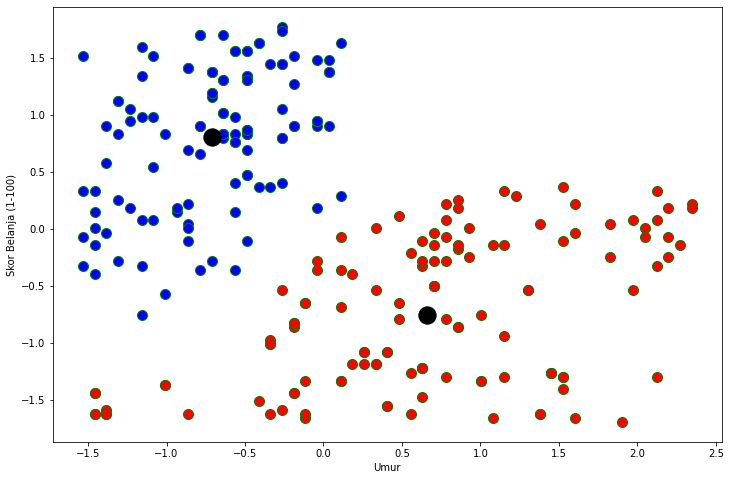

In [21]:
#code here
#clustering menggunakan kmeans clustering dengan k =2,
from sklearn.cluster import KMeans

kmeans1 = KMeans(n_clusters = 2, random_state=42).fit(df_std)
labels1 = kmeans1.labels_

new_df = pd.DataFrame(data=df_std, columns=['Umur', 'Skor Belanja (1-100)'])
new_df['label1_kmeans'] = labels1

plt.figure(figsize=(12,8))
plt.scatter(new_df['Umur'][new_df.label1_kmeans==0], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans==0], c='red', s=100, edgecolors='green')
plt.scatter(new_df['Umur'][new_df.label1_kmeans==1], new_df['Skor Belanja (1-100)'][new_df.label1_kmeans==1], c='blue', s=100, edgecolors='green')
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], c='k', s=300)

plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()


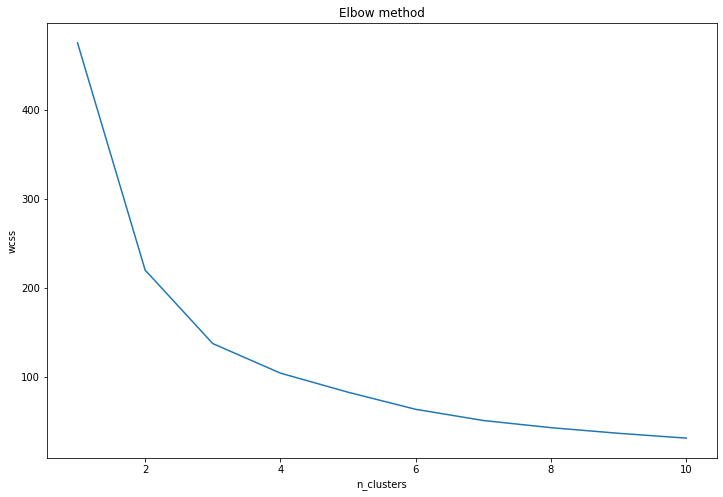

In [29]:
#code here
#Elbow method untuk menemukan jumlah k kluster yang tepat
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow method')
plt.xlabel('n_clusters')
plt.ylabel('wcss')

plt.show()

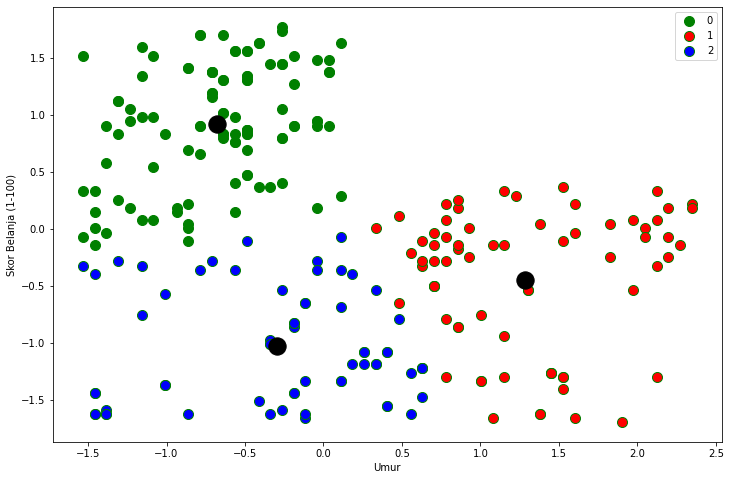

In [32]:
#code here
#Gunakan k=3 (rekomendasi methode Elbow) 
kmeans2 = KMeans(n_clusters = 3, init='k-means++', random_state=42)
kmeans2.fit(df_std)
labels2 = kmeans2.labels_

new_df['label2_kmeans'] = labels2

plt.figure(figsize=(12,8))

plt.scatter(new_df['Umur'][new_df.label2_kmeans==0], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans==0], label='0', c='green', s=100, edgecolors='green')
plt.scatter(new_df['Umur'][new_df.label2_kmeans==1], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans==1], label='1', c='red', s=100, edgecolors='green')
plt.scatter(new_df['Umur'][new_df.label2_kmeans==2], new_df['Skor Belanja (1-100)'][new_df.label2_kmeans==2], label='2', c='blue', s=100, edgecolors='green')

plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], c='k', s=300)
plt.legend()
plt.xlabel('Umur')
plt.ylabel('Skor Belanja (1-100)')
plt.show()

**Expected output**

cluster 2

![](https://drive.google.com/uc?id=1L7nIskGXbeXGhKOzhMWCykJ4jY5538mn)

elbow method

![](https://drive.google.com/uc?id=1a3OL9FhiQ2-DyJQ8sg8PNzfS9QsszyvU)

cluster 3

![](https://drive.google.com/uc?id=1UR6vK36oLJinLPtechjJJBtxifmdFOSn)


In [33]:
#silhoutte score
from sklearn.metrics import silhouette_score

print(silhouette_score(df_std, labels= labels1))
print(silhouette_score(df_std, labels= labels2))

0.4932872589322491
0.4710351865886273




---



---



---



#8. Analyze clustering result

Dari hasil klustering diatas, bisa dianalisis mengenai segmentasi pelanggan untuk targetted market supermarket

Finding: Untuk pelanggan usia muda terbagi dua segmen yaitu skor belanja yang rendah dan tinggi. Sementara pelanggan usia dewasa memiliki kelompok skor belanja yang rendah.